<a href="https://colab.research.google.com/github/HelloShagun/useful_libs/blob/main/examples/Polygons_to_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wayback Basemap Panel Exporter

This repository provides a small Python utility to export
**publication-ready PNG map panels** of lake (or water body) polygons
over **Esri Wayback satellite imagery**, with:

- polygon boundaries
- scale bar
- north arrow
- latitude / longitude labels

The tool is designed for use in **Google Colab or Jupyter notebooks**
and integrates easily with raster-to-vector workflows
(e.g. connected-component lake extraction).

---

## Input requirements

The exporter expects **vector polygons** as input.

### Accepted formats
- GeoJSON (`.geojson`)
- Shapefile (`.shp`)
- GeoPackage (`.gpkg`)

### Geometry requirements
- Geometry type: `Polygon` or `MultiPolygon`
- CRS: **EPSG:4326 (WGS84 longitude/latitude)**

### Attribute table (minimum)
Only the geometry is strictly required.

Recommended attributes:
- `obj_id` — unique lake/object identifier (used for naming PNG files)
- `area_ha`, `area_m2`, `px_count` — optional, for reference

Example attribute table:

| obj_id | area_ha | area_m2 | px_count | geometry |
|------|-------|--------|---------|---------|
| 8 | 0.14 | 1400 | 14 | Polygon |

---

## Example input

A minimal example polygon file is provided in:



In [ ]:
!git clone https://github.com/HelloShagun/useful_libs

In [3]:
from google.colab import output
output.enable_custom_widget_manager()

In [4]:
import sys
sys.path.append("/content/useful_libs/basemap")

In [6]:
!pip -q install geopandas shapely contextily pyproj scikit-learn
from wayback_export import export_wayback_panels, ExportStyle

In [10]:
###### Importing the File. This is important to understand how the geojson should be like
tmp_geojson = "/content/useful_libs/Data/ae_new_lakes.geojson"

KeyboardInterrupt: 

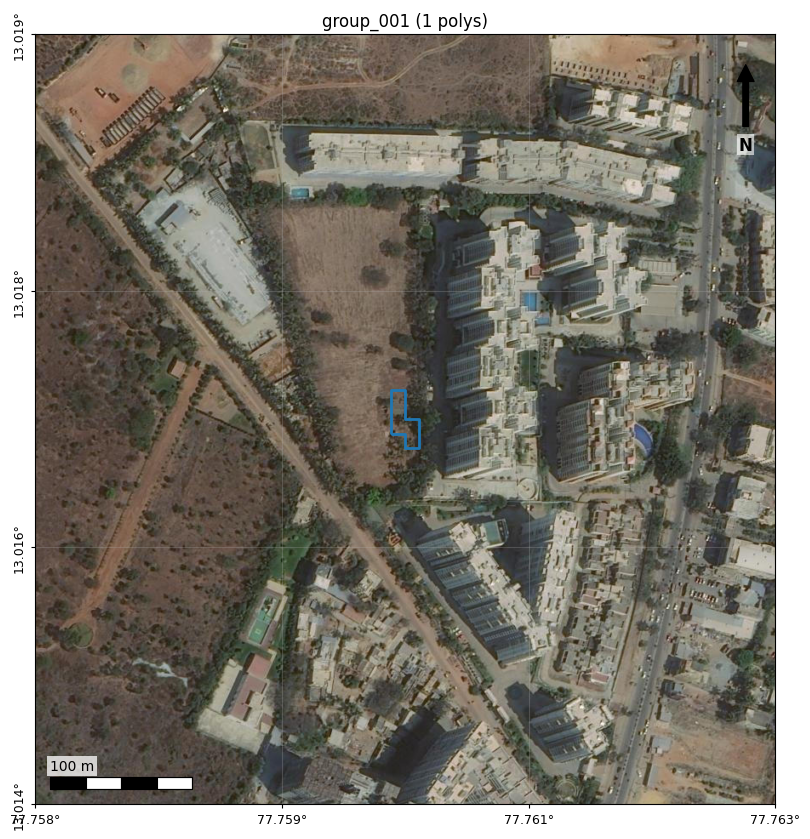

In [9]:
style = ExportStyle(
    pad_m=250,
    dpi=450,
    draw_coords=True,
    draw_scalebar=True,
    draw_north_arrow=True
)

saved = export_wayback_panels(
    polygons_path=tmp_geojson,
    out_dir="/content/wayback_pngs",
    wayback_date="2021-01-13",
    mode="grouped",          # or "individual"
    group_eps_m=400,         # only matters if grouped
    id_field="obj_id",       # optional (if your geojson has this field)
    style=style,
)

saved[:1], len(saved)